In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('data_for_predictions.csv')

In [3]:
df.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


In [4]:
df = df.drop(['Unnamed: 0','id'], axis = 1)

In [5]:
df.churn.value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

In [6]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score

In [7]:
y = df['churn']
x = df.drop(columns=['churn'])
print(x.shape)
print(y.shape)

(14606, 61)
(14606,)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11684, 61)
(11684,)
(2922, 61)
(2922,)


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaled_df = scaler.fit_transform(df)
scaled_df

array([[-4.77559131,  2.30673881, -1.28000758, ..., -0.64529688,
        -0.52415889,  1.02861689],
       [-0.62800351, -0.45383732, -1.28000758, ...,  1.54967431,
        -0.52415889, -0.97217926],
       [-1.68181745, -0.45383732, -1.28000758, ...,  1.54967431,
        -0.52415889, -0.97217926],
       ...,
       [-1.08305107, -0.45383732, -0.00529814, ..., -0.64529688,
        -0.52415889,  1.02861689],
       [-2.37806734, -0.45383732, -1.28000758, ..., -0.64529688,
        -0.52415889,  1.02861689],
       [-0.31981865, -0.45383732, -1.28000758, ..., -0.64529688,
         1.90781846, -0.97217926]])

# Logistic Regression

In [13]:
lr = LogisticRegression(max_iter=500, solver='lbfgs', random_state=42)
lr.fit(x_train, y_train)

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=42)

In [14]:
y_pred_lr = lr.predict(x_test)

In [15]:
print('Accuracy: ', accuracy_score(y_test, y_pred_lr))
print("Overall Precision:",precision_score(y_test, y_pred_lr))
print("Overall Recall:",recall_score(y_test, y_pred_lr))

Accuracy:  0.8959616700889802
Overall Precision: 0.6
Overall Recall: 0.009836065573770493


In [16]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.60      0.01      0.02       305

    accuracy                           0.90      2922
   macro avg       0.75      0.50      0.48      2922
weighted avg       0.87      0.90      0.85      2922



Text(113.9222222222222, 0.5, 'Actual')

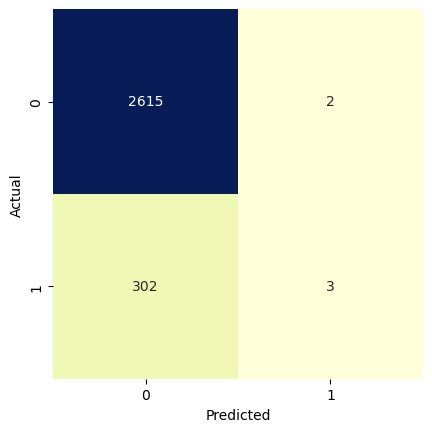

In [17]:
cm = confusion_matrix(y_test, y_pred_lr) 
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [18]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_lr).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 3
False positives: 2
True negatives: 2615
False negatives: 302



In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

In [20]:
y_scores = lr.predict_proba(x_test)
print(y_scores[:10])

[[0.92182715 0.07817285]
 [0.92108325 0.07891675]
 [0.91402953 0.08597047]
 [0.87452399 0.12547601]
 [0.87740753 0.12259247]
 [0.90824914 0.09175086]
 [0.9194215  0.0805785 ]
 [0.95915984 0.04084016]
 [0.92088804 0.07911196]
 [0.96520095 0.03479905]]


In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

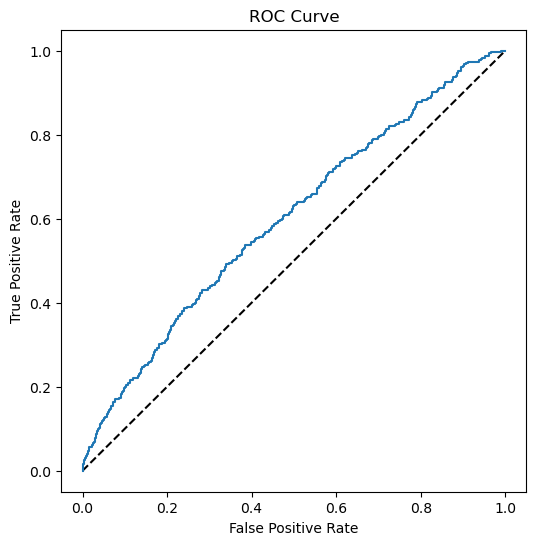

In [22]:
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [23]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.5985203931419407


# Random Forest

In [25]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
y_pred_RF = clf.predict(x_test)

In [27]:
print('Accuracy: ', accuracy_score(y_test, y_pred_RF))
print("Overall Precision:",precision_score(y_test, y_pred_RF))
print("Overall Recall:",recall_score(y_test, y_pred_RF))

Accuracy:  0.9000684462696783
Overall Precision: 0.8095238095238095
Overall Recall: 0.05573770491803279


In [28]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.81      0.06      0.10       305

    accuracy                           0.90      2922
   macro avg       0.86      0.53      0.53      2922
weighted avg       0.89      0.90      0.86      2922



Text(113.9222222222222, 0.5, 'Actual')

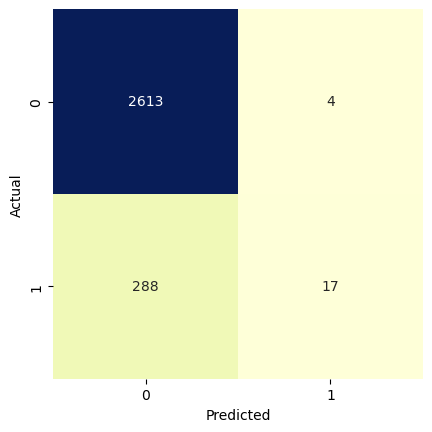

In [29]:
cm = confusion_matrix(y_test, y_pred_RF) 
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [30]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_RF).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 17
False positives: 4
True negatives: 2613
False negatives: 288



In [31]:
y_scores = clf.predict_proba(x_test)
print(y_scores[:10])

[[0.88       0.12      ]
 [0.81       0.19      ]
 [0.91       0.09      ]
 [0.96       0.04      ]
 [0.93       0.07      ]
 [0.89       0.11      ]
 [1.         0.        ]
 [0.80538462 0.19461538]
 [0.99       0.01      ]
 [0.96       0.04      ]]


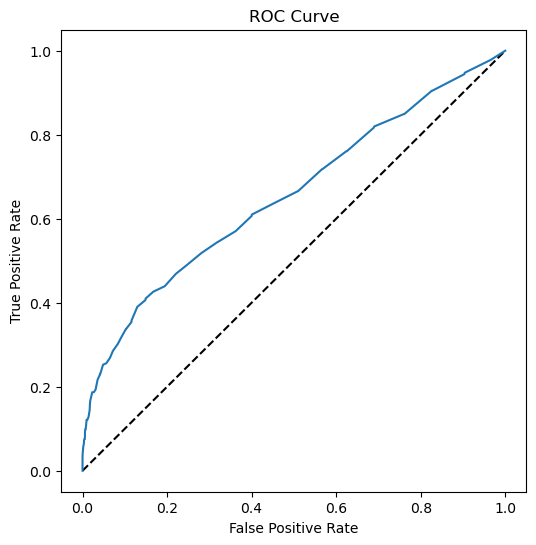

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [33]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.6543908993529068


# Hyperparametertuning for Random Forest

In [35]:
rfc = RandomForestClassifier()

In [36]:
param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

In [37]:
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [38]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12, 16],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=2)

In [39]:
print('Best parameters: ', grid.best_params_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [42]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=2, min_samples_split=2, random_state=42)

In [44]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=2,
                       random_state=42)

In [48]:
rfc_pred = rfc.predict(x_test)

In [50]:
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       1.00      0.04      0.07       305

    accuracy                           0.90      2922
   macro avg       0.95      0.52      0.51      2922
weighted avg       0.91      0.90      0.86      2922



# Oversampling using SMOTE

In [52]:
from imblearn.over_sampling import SMOTE

In [54]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [56]:
print(x_train_resampled.shape)
print(y_train_resampled.shape)

(21140, 61)
(21140,)


In [76]:
clf = RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=2, min_samples_split=2, random_state=42, class_weight='balanced')
clf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=16, min_samples_leaf=2, random_state=42)

In [77]:
Y_pred = clf.predict(x_test)

In [78]:
print('Accuracy: ', accuracy_score(y_test, Y_pred))
print("Overall Precision:",precision_score(y_test, Y_pred))
print("Overall Recall:",recall_score(y_test, Y_pred))

Accuracy:  0.891170431211499
Overall Precision: 0.4155844155844156
Overall Recall: 0.10491803278688525


In [79]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2617
           1       0.42      0.10      0.17       305

    accuracy                           0.89      2922
   macro avg       0.66      0.54      0.55      2922
weighted avg       0.85      0.89      0.86      2922



Text(113.9222222222222, 0.5, 'Actual')

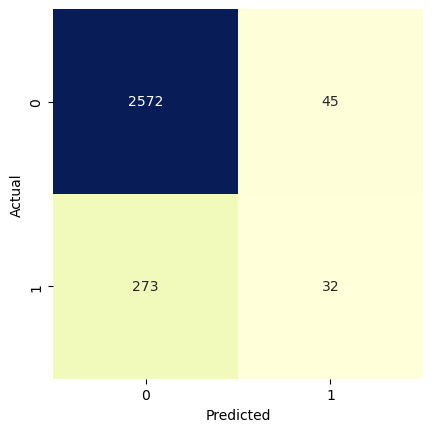

In [80]:
cm = confusion_matrix(y_test, Y_pred) 
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [81]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, Y_pred).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 32
False positives: 45
True negatives: 2572
False negatives: 273



In [82]:
y_scores = clf.predict_proba(x_test)
print(y_scores[:10])

[[0.94482005 0.05517995]
 [0.69782232 0.30217768]
 [0.90030707 0.09969293]
 [0.84908944 0.15091056]
 [0.88302116 0.11697884]
 [0.55647471 0.44352529]
 [0.94875524 0.05124476]
 [0.72375501 0.27624499]
 [0.92791705 0.07208295]
 [0.98083333 0.01916667]]


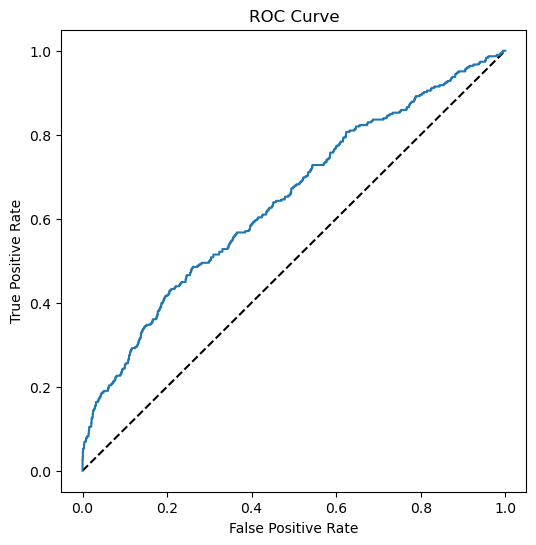

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()